## K-Nearest Neighbor

In [30]:
# Importing all the libraries
import pandas as pd
import sklearn . neighbors as skl_nb
import sklearn . preprocessing as skl_pre
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sys 
sys.path.append('..')
from utils.features import FeatureEngineering
from utils.model_eval import cross_validate, ModelEvaluation

## Import data and Feature Engineering

In [15]:
df_movies = pd.read_csv('../data/train.csv')
FE = FeatureEngineering()

df_movies = FE.run_feature_engineering(df_movies)

## Hyperparameter Tuning

euclidean and 1 uniform
0.8113665923448533
euclidean and 2 uniform
0.794017094017094
euclidean and 3 uniform
0.8392697881828317
euclidean and 4 uniform
0.836371237458194
euclidean and 5 uniform
0.843106651802304
euclidean and 6 uniform
0.8402220364176886
euclidean and 7 uniform
0.8546636937941287
euclidean and 8 uniform
0.8604468599033817
euclidean and 9 uniform
0.8585284280936454
euclidean and 10 uniform
0.858519137866964
euclidean and 11 uniform
0.8546869193608325
euclidean and 12 uniform
0.8488944630248978
euclidean and 13 uniform
0.8498745819397995
euclidean and 14 uniform
0.8469806763285025
euclidean and 15 uniform
0.8450668896321071
euclidean and 16 uniform
0.8498745819397995
euclidean and 17 uniform
0.8460191378669639
euclidean and 18 uniform
0.8450622445187662
euclidean and 19 uniform
0.8402499070977332
euclidean and 20 uniform
0.8441007060572279
euclidean and 21 uniform
0.8402452619843924
euclidean and 22 uniform
0.8421636937941285
euclidean and 23 uniform
0.8402406168710517
e

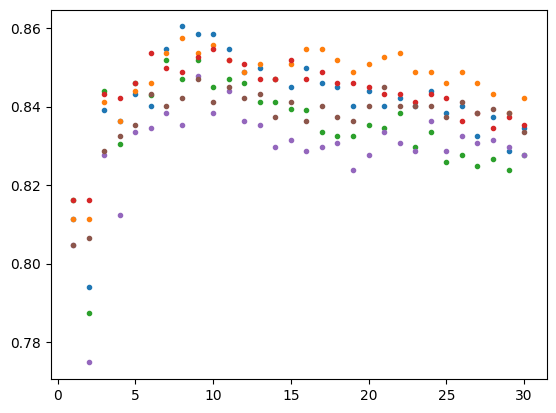

In [16]:
best = []
for metrix in ['euclidean', 'manhattan', 'chebyshev']:
    for weights in ['uniform', 'distance']:
        accuracy_list = []
        # k is not restricted as distance can work we even numbers
        for k in range(30):
            model_knn = skl_nb.KNeighborsClassifier(n_neighbors=k+1, weights= weights, metric = metrix)
            labels = df_movies["Lead"]
            
            #add your selected features here
            
            data_cross = df_movies[["Difference in words lead and co-lead","Female actor share","Difference Words Gender","Number words female", "Male actor share", "Number of female actors"]]
            cv_output = cross_validate(model_knn,data_cross,labels,cv=5,scoring=["accuracy"],)
            
            # Calculate key metrics for output
            accuracy = cv_output["test_accuracy"]
            avg_acc, min_acc, max_acc = np.mean(accuracy), np.min(accuracy), np.max(accuracy)
            print(metrix, "and", k+1, weights)
            print(avg_acc)
            accuracy_list.append(avg_acc)
        best.append(max(accuracy_list))
        best
        print("bestes", max(best))
        K = np.linspace(1,30,30)
        plt.plot(K, accuracy_list, ".")
        plt.show

## First Model

In [21]:
df_movies = df_movies[['Lead','Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors']]

model_knn = skl_nb.KNeighborsClassifier(n_neighbors=6,weights="distance", metric="euclidean")

cv_output = cross_validate(model_knn,data_cross,labels,cv=5, return_train_score=True)
print(f"Average testscore: {cv_output['test_score'].mean()}")

Average testscore: 0.8460005574136009


## First Selection

In [22]:
df_movies = df_movies[['Lead','Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors']]

model_knn = skl_nb.KNeighborsClassifier(n_neighbors=10, weights="distance", metric="chebyshev")
data_cross = df_movies.drop(["Lead", "Number words male", "Gross", "Mean Age Female", "Mean Age Male", "Number words female"],axis=1)

cv_output = cross_validate(model_knn,data_cross,labels,cv=5, return_train_score=True)
print(f"Average testscore: {cv_output['test_score'].mean()}")

Average testscore: 0.7863247863247863


## Best model with K=7

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
df_movies = pd.read_csv('../data/train.csv')
df_movies = FE.run_feature_engineering(df_movies)
features = df_movies[df_movies.columns.drop("Lead")]
target = df_movies["Lead"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target)
knn = KNN(n_neighbors=7)


sfs5 = SFS(knn, k_features=5).fit(X_train, y_train)

print(sfs5.k_feature_names_)
#chebyshev and 6 uniform
model_knn = skl_nb.KNeighborsClassifier(n_neighbors=6, weights="uniform", metric="chebyshev")
data_cross = df_movies[["Difference in words lead and co-lead",
        "Female word share",
        "Male actor share",
        "Yearly mean diff Number of words lead",
        "Yearly mean diff Difference in words lead and co-lead"]]

model_evaluation = ModelEvaluation()

#[["Difference in words lead and co-lead", "Female actor share", "Lead word share", "Difference Words Gender", "Difference Age Lead"]]



model_evaluation.cross_val(model_knn,features=data_cross, target=labels)

('Number words female', 'Number of female actors', 'Age Lead', 'Female word share', 'Female / male actor ratio')
----------- Cross-validation report -----------

Model: KNeighborsClassifier(metric='chebyshev', n_neighbors=6)

Feature set: ['Difference in words lead and co-lead', 'Female word share', 'Male actor share', 'Yearly mean diff Number of words lead', 'Yearly mean diff Difference in words lead and co-lead']

Number of folds: 5

Performance:
- Accuracy: 0.887 (avg), 0.880 (min), 0.913 (max)
- Accuracy, 95.0 % confidence interval: 0.793-0.982
- Accuracy, female: 0.682 (avg), 0.569 (min), 0.820 (max)
- Accuracy, male: 0.954 (avg), 0.943 (min), 0.981 (max)
- Training accuracy: 0.912 (avg), 0.905 (min), 0.923 (max)
---------------------------------------------



## Best Model
The process including removing features based on Sequential feature Selection, And then running the own written exhaustive hyperparameter optimization.

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target)
knn = KNN(n_neighbors=7)


sfs5 = SFS(knn, k_features=5).fit(X_train, y_train)

print(sfs5.k_feature_names_)
#chebyshev and 6 uniform
model_knn = skl_nb.KNeighborsClassifier(n_neighbors=6, weights="uniform", metric="chebyshev")
data_cross = df_movies[["Difference in words lead and co-lead",
        "Female word share",
        "Male actor share",
        "Yearly mean diff Number of words lead",
        "Yearly mean diff Difference in words lead and co-lead"]]

model_evaluation = ModelEvaluation()

#[["Difference in words lead and co-lead", "Female actor share", "Lead word share", "Difference Words Gender", "Difference Age Lead"]]



model_evaluation.cross_val(model_knn,features=data_cross, target=labels)

('Number words female', 'Difference in words lead and co-lead', 'Number of female actors', 'Female word share', 'Male actor share')
----------- Cross-validation report -----------

Model: KNeighborsClassifier(metric='chebyshev', n_neighbors=6)

Feature set: ['Difference in words lead and co-lead', 'Female word share', 'Male actor share', 'Yearly mean diff Number of words lead', 'Yearly mean diff Difference in words lead and co-lead']

Number of folds: 5

Performance:
- Accuracy: 0.887 (avg), 0.880 (min), 0.913 (max)
- Accuracy, 95.0 % confidence interval: 0.793-0.982
- Accuracy, female: 0.682 (avg), 0.569 (min), 0.820 (max)
- Accuracy, male: 0.954 (avg), 0.943 (min), 0.981 (max)
- Training accuracy: 0.912 (avg), 0.905 (min), 0.923 (max)
---------------------------------------------



## Previous other models:

In [35]:
#euclidean and 14 uniform
#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=8, weights="distance", metric="euclidean")
#data_cross = df_movies[["Number words female", "Difference in words lead and co-lead", "Number of female actors", "Number words male"]]

#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=7, weights="distance", metric="manhattan")
#data_cross = df_movies[["Number words female", "Difference in words lead and co-lead", "Number of female actors", "Number words male"]]

#new best
#euclidean and 10 uniform
#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=10, weights="uniform", metric="euclidean")
#data_cross = df_movies[["Number words female", "Difference in words lead and co-lead", "Number of female actors", "Number words male", "Female actor share"]]

#new best Lead word share, manhattan and 6 distance

#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=6, weights="distance", metric="manhattan")
#data_cross = df_movies[["Number words female", "Difference in words lead and co-lead", "Number of female actors", "Number words male", "Female actor share", "Lead word share"]]

#new best 
#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=4, weights="distance", metric="euclidean")
#data_cross = df_movies[["Number words female", "Difference in words lead and co-lead", "Number of female actors", "Female actor share", "Lead word share", "Difference Words Gender"]]

#new best euclidean and 4 distance
#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=4, weights="distance", metric="euclidean")
#data_cross = df_movies[["Difference in words lead and co-lead", "Female actor share", "Lead word share", "Difference Words Gender"]]

#manhattan and 4 distance new best
#model_knn = skl_nb.KNeighborsClassifier(n_neighbors=4, weights="distance", metric="manhattan")
#data_cross = df_movies[["Difference in words lead and co-lead", "Female actor share", "Lead word share", "Difference Words Gender", "Difference Age Lead"]]

#chebyshev and 8 uniform
model_knn = skl_nb.KNeighborsClassifier(n_neighbors=8, weights="uniform", metric="chebyshev")
data_cross = df_movies[["Difference in words lead and co-lead", "Female actor share", "Difference Words Gender", "Difference Age Lead", "Number words female"]]

model_evaluation = ModelEvaluation()

model_evaluation.cross_val(model_knn,features=data_cross, target=labels)

----------- Cross-validation report -----------

Model: KNeighborsClassifier(metric='chebyshev', n_neighbors=8)

Feature set: ['Difference in words lead and co-lead', 'Female actor share', 'Difference Words Gender', 'Difference Age Lead', 'Number words female']

Number of folds: 5

Performance:
- Accuracy: 0.866 (avg), 0.850 (min), 0.880 (max)
- Accuracy, 95.0 % confidence interval: 0.772-0.960
- Accuracy, female: 0.650 (avg), 0.569 (min), 0.760 (max)
- Accuracy, male: 0.936 (avg), 0.879 (min), 0.968 (max)
- Training accuracy: 0.885 (avg), 0.872 (min), 0.895 (max)
---------------------------------------------

